In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
train_clean = pd.read_csv('datasets/train_clean.csv')

In [4]:
train_clean.head()

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,0,20,RL,85.00000,10667,Pave,Reg,Lvl,AllPub,Inside,...,44,0,0,0,0,0,3,2007,WD,167300
1,1,70,RL,107.00000,12888,Pave,Reg,Bnk,AllPub,Inside,...,0,0,0,0,0,0,4,2007,WD,219000
2,2,20,RL,60.00000,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,7,2007,WD,129000
3,3,60,RL,80.00000,14000,Pave,Reg,Lvl,AllPub,Inside,...,44,0,0,0,0,0,4,2010,WD,328000
4,4,60,RL,69.37821,11929,Pave,IR1,Lvl,AllPub,CulDSac,...,87,0,0,0,0,0,6,2008,WD,290000


**EDA as part of Problem Statement**

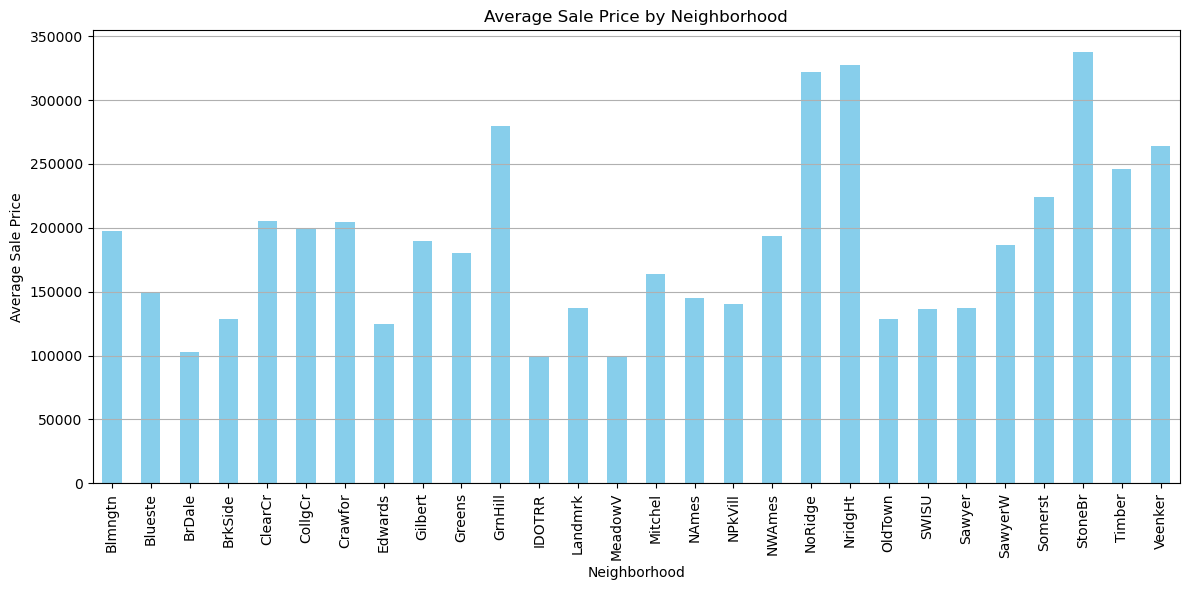

In [5]:
neighborhood_avg_price = train_clean.groupby('Neighborhood')['SalePrice'].mean()

plt.figure(figsize=(12, 6))
neighborhood_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Sale Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=90) 
plt.grid(axis='y')  
plt.tight_layout() 
plt.show()

In [7]:
# Filter the dataset to include only the houses in the specified neighborhood
neighborhood_data = train_clean[train_clean['Neighborhood'] == 'OldTown']
old_town = train_clean[train_clean['Neighborhood'] == 'OldTown']

# Calculate the average price
average_price = neighborhood_data['SalePrice'].mean()
average_price

128473.61061946902

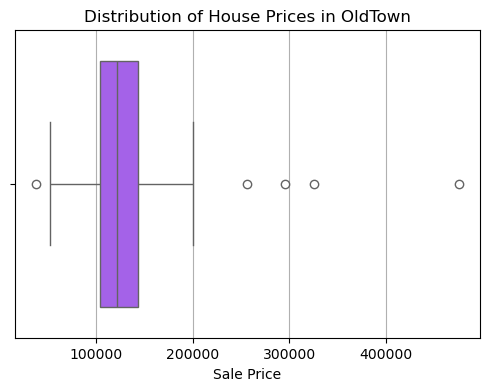

In [8]:
# Convert the Series of sale prices to a DataFrame with a single column
neighborhood_data = pd.DataFrame(neighborhood_data['SalePrice'])

# Plotting a box plot of sale prices in the specified neighborhood using Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot(x='SalePrice', data=neighborhood_data, color='#A44BFF')
plt.title('Distribution of House Prices in ' + 'OldTown')
plt.xlabel('Sale Price')
plt.grid(axis='x')  # Add grid lines on x-axis only
plt.show()

In [9]:
train_clean['Overall Qual']

0       6
1       7
2       5
3       7
4       8
       ..
1533    8
1534    6
1535    6
1536    6
1537    7
Name: Overall Qual, Length: 1538, dtype: int64

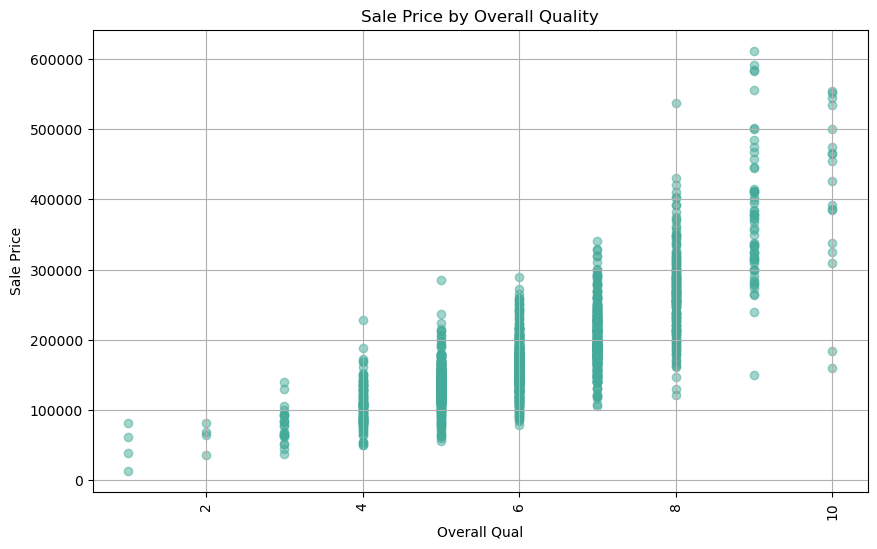

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(train_clean['Overall Qual'], train_clean['SalePrice'], alpha=0.5, color = '#44AA99')
plt.title('Sale Price by Overall Quality')
plt.xlabel('Overall Qual')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)  
plt.grid(True)
plt.show()

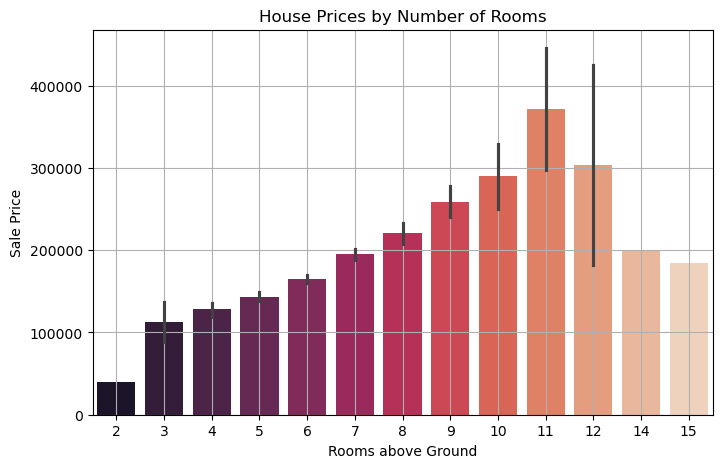

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x='TotRms AbvGrd', y='SalePrice', data=train_clean, palette= 'rocket')
plt.title('House Prices by Number of Rooms')
plt.xlabel('Rooms above Ground')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show();

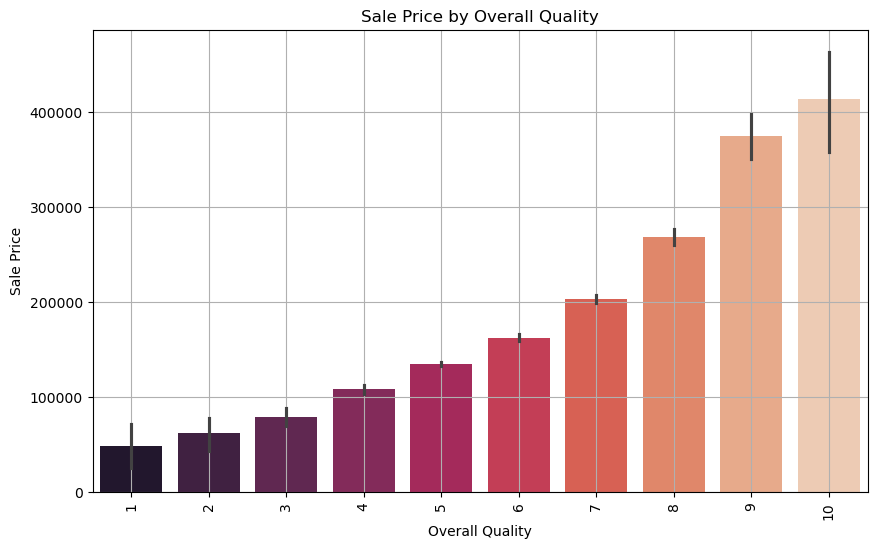

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Overall Qual', y='SalePrice', data=train_clean, palette='rocket')
plt.title('Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.xticks(rotation=90) 
plt.grid(True)
plt.show()

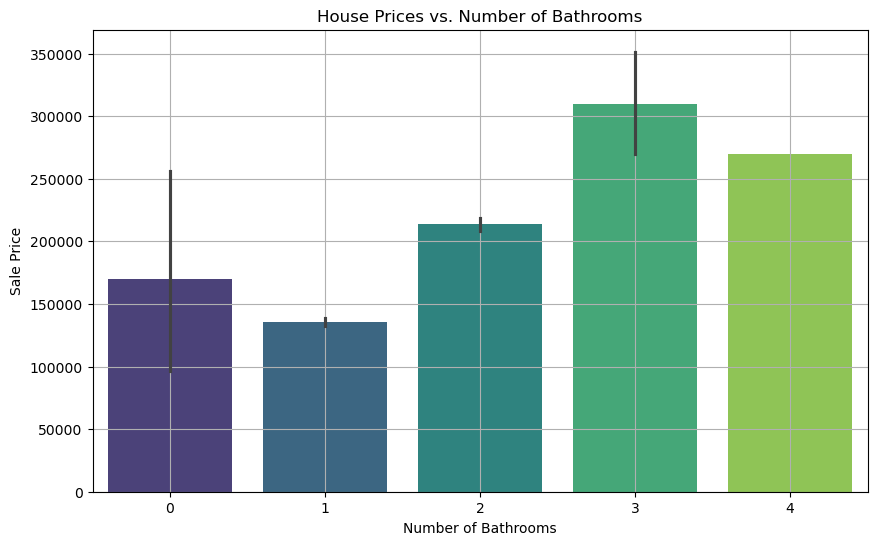

In [13]:
colors = sns.color_palette('viridis', n_colors=len(train_clean['Full Bath'].unique()))

plt.figure(figsize=(10, 6))
sns.barplot(x='Full Bath', y='SalePrice', data=train_clean, palette= colors)
plt.title('House Prices vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show();

In [14]:
train_clean['Fireplaces']

0       1
1       2
2       0
3       0
4       1
       ..
1533    2
1534    1
1535    1
1536    0
1537    0
Name: Fireplaces, Length: 1538, dtype: int64

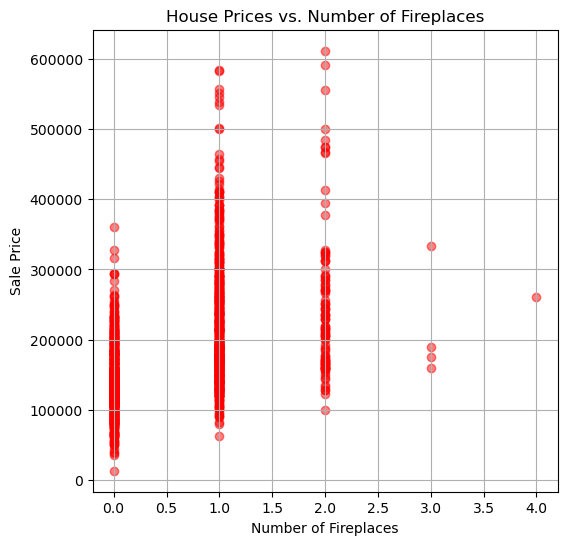

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(train_clean['Fireplaces'], train_clean['SalePrice'], alpha=0.5, color = 'red')
plt.title('House Prices vs. Number of Fireplaces')
plt.xlabel('Number of Fireplaces')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

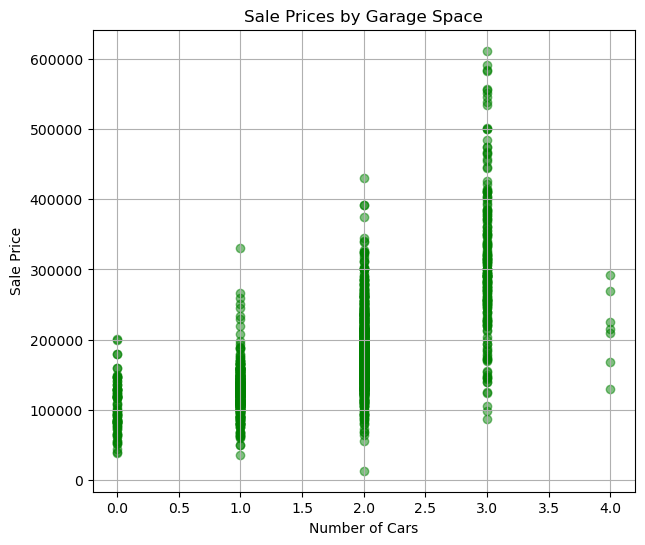

In [16]:
plt.figure(figsize=(7, 6))
plt.scatter(train_clean['Garage Cars'], train_clean['SalePrice'], alpha=0.5, color='green')  
plt.title('Sale Prices by Garage Space')
plt.xlabel('Number of Cars')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

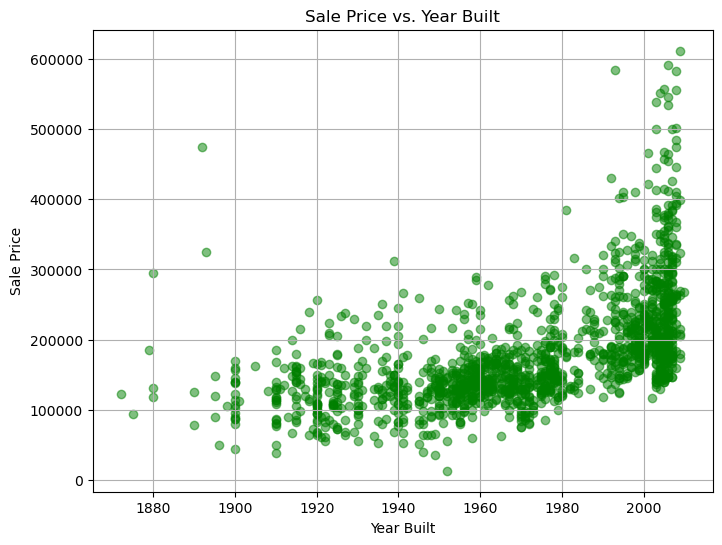

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(train_clean['Year Built'], train_clean['SalePrice'], alpha=0.5, color='green')  
plt.title('Sale Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

In [18]:
data = train_clean.loc[train_clean['Neighborhood'] == 'OldTown', ['Fireplaces', 'Garage Cars', 'SalePrice', 'Full Bath', 'Year Built','TotRms AbvGrd', 'Overall Qual']]
data

,Fireplaces,Garage Cars,SalePrice,Full Bath,Year Built,TotRms AbvGrd,Overall Qual
6,0,2.0,139900,1,1900,7,7
10,2,2.0,163000,1,1914,6,7
12,1,1.0,129000,1,1948,7,5
15,0,1.0,108000,1,1924,5,6
23,0,2.0,140000,2,1921,9,7
...,...,...,...,...,...,...,...
1404,0,2.0,169000,2,1900,8,5
1476,1,1.0,116900,1,1926,5,7
1484,1,1.0,144000,1,1916,7,7
1488,0,0.0,76500,2,1910,12,5


In [22]:
filtered_data = data[(data['Fireplaces'] == 1) & 
                     (data['Garage Cars'] >=2) & 
                     data['Full Bath'].isin([2, 3]) & 
                     (data['Year Built'] <2000)]
filtered_data

,Fireplaces,Garage Cars,SalePrice,Full Bath,Year Built,TotRms AbvGrd,Overall Qual
155,1,2.0,170000,2,1936,7,5
413,1,2.0,185000,2,1879,8,7
797,1,2.0,142900,2,1915,8,4
991,1,2.0,325000,3,1893,9,10
998,1,3.0,180000,2,1925,10,5
1200,1,3.0,295000,3,1880,10,7
1328,1,2.0,163000,2,1905,7,6
